<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module4-clustering/U2_S1_D4_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the TMDB 5000 dataset from Kaggle to try and cluster similar movies. 

It may be helpful to use PCA to reduce the dimensions of your data first - but then again maybe not. I dunno, you're the data scientist, you tell me. 🤪 

I'll let you download the dataset and get it into your notebook in the way that works best for you:

<https://www.kaggle.com/tmdb/tmdb-movie-metadata/version/2>

There are a few weird data cleaning steps that you'll need to do that I don't want you to get stuck on or spend a lot of time on so I'll try and help you out a little bit. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from numpy.linalg import eig


In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/tmdb_5000_movies.csv")
print(df.shape)
df.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [27]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)  

# Filter the dataframe by only the numeric columns
df_numeric = df[num_list]
df_numeric.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [0]:
# lazily fill NaNs with zeros
df_numeric = df_numeric.fillna(value=0, axis=1)

# just going to drop ID since this isnt really a feature
df_numeric.drop('id',axis=1);

In [0]:
df_numeric.set_index('id', inplace=True)

In [0]:
### OR
# We could select all columns with numeric values in the df
numeric_df = df.select_dtypes('number').copy()
numeric_df.set_index('id', inplace=True)
numeric_df = numeric_df.fillna(value=0, axis=1)


# You take it from here!

See what you can come up with. You have all the know-how! 

### Choosing an appropriate k (# of clusters)

In [0]:
sum_of_squared_distances = []
K = range(1,10) 
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_numeric)
    sum_of_squared_distances.append(km.inertia_)

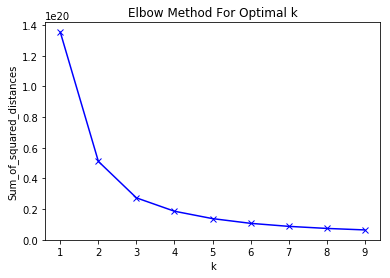

In [31]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on graph above, 3-4 clusters would be enough

In [0]:
# kmeans with k=4
km4 = KMeans(n_clusters=4)
km4 = km4.fit(df_numeric)

#add the cluster column to the initial dataframe
df['K4_label'] = km4.labels_ 

### Clustering

In [0]:
df_num = df_numeric.copy()

In [0]:
df_num['K4_label'] = km4.labels_

In [38]:
df_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,K4_label
id,,,,,,,
19995,237000000,150.437577,2787965087,162.0,7.2,11800,3
285,300000000,139.082615,961000000,169.0,6.9,4500,3
206647,245000000,107.376788,880674609,148.0,6.3,4466,3
49026,250000000,112.312950,1084939099,165.0,7.6,9106,3
49529,260000000,43.926995,284139100,132.0,6.1,2124,1


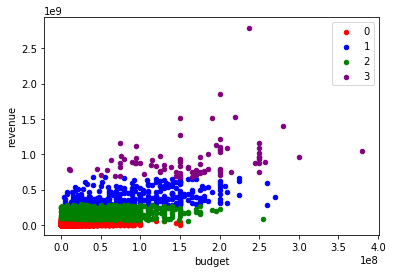

In [62]:
colors = {0:'red', 1:'blue', 2:'green', 3: 'purple'}
fig, ax = plt.subplots()
grouped = df_num.groupby('K4_label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='budget', y='revenue', label=key, color=colors[key])
plt.show();                  

In [0]:
points = df_num.drop('K4_label', axis=1)

In [0]:
import math
import numpy as np
from scipy.spatial import distance

In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids


In [0]:
centroids = get_centroids(df_num, 'K4_label')

In [0]:
# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [0]:
points

In [102]:
first_pass = find_nearest_centroid(points, centroids, '1')
first_pass.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,cluster_1
id,,,,,,,
19995,237000000,150.437577,2787965087,162.0,7.2,11800,3
285,300000000,139.082615,961000000,169.0,6.9,4500,3
206647,245000000,107.376788,880674609,148.0,6.3,4466,3
49026,250000000,112.312950,1084939099,165.0,7.6,9106,3
49529,260000000,43.926995,284139100,132.0,6.1,2124,1


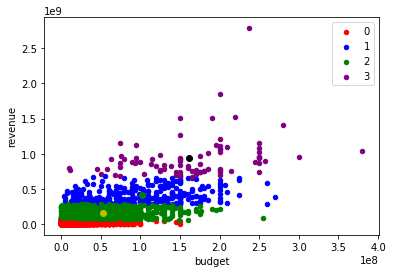

In [103]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'blue', 2:'green', 3: 'purple'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].budget, centroids.iloc[0].revenue, "or")
  ax.plot(centroids.iloc[1].budget, centroids.iloc[1].revenue, "og")
  ax.plot(centroids.iloc[2].budget, centroids.iloc[2].revenue, "oy")
  ax.plot(centroids.iloc[3].budget, centroids.iloc[3].revenue, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='budget', y='revenue', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [0]:
first_pass

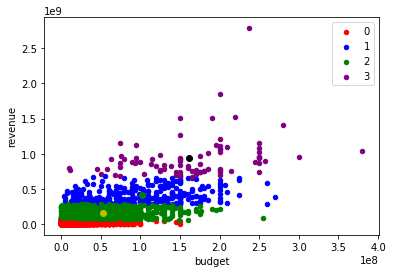

In [111]:
# Calculate New Centroids
centroids = get_centroids(first_pass, 'cluster_1')
first_pass_two = first_pass.drop('cluster_1', axis=1).copy()

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass_two, centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

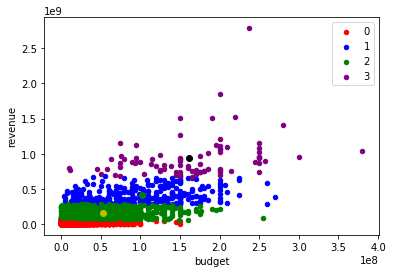

In [112]:
# Calculate New Centroids
centroids = get_centroids(second_pass, 'cluster_2')
second_pass_two = second_pass.drop('cluster_2', axis=1).copy()

# Get Clusters for New Centroids
third_pass = find_nearest_centroid(second_pass_two, centroids, '3')

# Plot New Cluster
plot_clusters(third_pass, 'cluster_3', centroids)

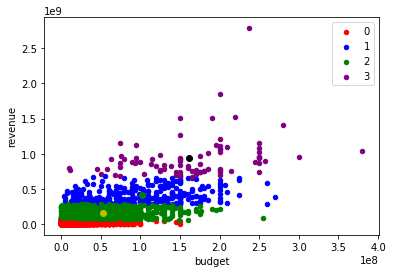

In [113]:
# Calculate New Centroids
centroids = get_centroids(third_pass, 'cluster_3')
third = third_pass.drop('cluster_3', axis=1).copy()

# Get Clusters for New Centroids
fourth_pass = find_nearest_centroid(third, centroids, '4')

# Plot New Cluster
plot_clusters(fourth_pass, 'cluster_4', centroids)

### Apply PCA before clustering

In [0]:
#PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

stdsc = StandardScaler()
X = df_numeric

#standartize the X dataframe
X_std = stdsc.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
#pca with all components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_std)
print('\n Projected Data: \n', X_pca)

pca.fit(X)
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

From the data above, we can see that first two eigenvalues, which correspond to budget and popularity columns are much bigger than others, it might make sense to use 2 pca's

In [0]:
# df_pc = pd.DataFrame(X_pca, columns=['PC1',	'PC2',	'PC3',	'PC4',	'PC5','PC6'])
# df_pc.head()

In [0]:
#pca with two components
pca_two = PCA(n_components=2)
X_pca_two = pca_two.fit_transform(X_std)
print('\n Projected Data: \n', X_pca_two)

pca.fit(X)
print("\n Eigenvectors: \n", pca_two.components_)
print("\n Eigenvalues: \n",pca_two.explained_variance_)


 Projected Data: 
 [[17.51625467 -4.09403887]
 [ 9.58467699 -1.39684442]
 [ 7.94604987 -1.7613107 ]
 ...
 [-0.80505508  1.29732662]
 [-1.30064781 -0.05798822]
 [-1.25546873  0.07544534]]

 Eigenvectors: 
 [[ 0.43048454  0.45951548  0.48961539  0.24890819  0.22638686  0.5005987 ]
 [-0.25417049 -0.09953298 -0.22051946  0.6115343   0.70259223 -0.09618566]]

 Eigenvalues: 
 [3.26606119 1.1505074 ]


In [117]:
df_pca_two = pd.DataFrame(X_pca_two, columns=['PC1', 'PC2'])
df_pca_two.head()

,PC1,PC2
0,17.516255,-4.094039
1,9.584677,-1.396844
2,7.946050,-1.761311
3,10.998706,-1.223685
4,4.231538,-1.214606


### Clustering After PCA

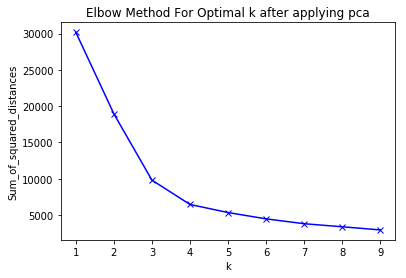

In [119]:
sum_of_squared_distances_after_pca = []
K = range(1,10) 
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca_two)
    sum_of_squared_distances_after_pca.append(km.inertia_)
plt.plot(K, sum_of_squared_distances_after_pca, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k after applying pca')
plt.show()

4 clusters look like an appropriate number of clusters

In [0]:
# kmeans with k=4
km4 = KMeans(n_clusters=4)
km4 = km4.fit(df_pca_two)
df_pca_two_kmeans = km4.predict(df_pca_two)

#add the cluster column to the initial dataframe
df_pca_two['K4_label'] = km4.labels_ 

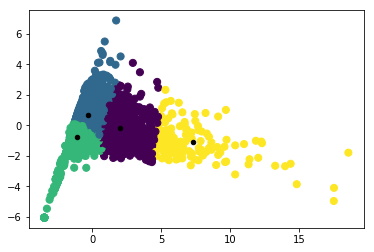

In [126]:
plt.scatter(df_pca_two['PC1'], 
            df_pca_two['PC2'], 
            c=df_pca_two_kmeans, 
            s=50, 
            cmap = 'viridis')

centers = km4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20);


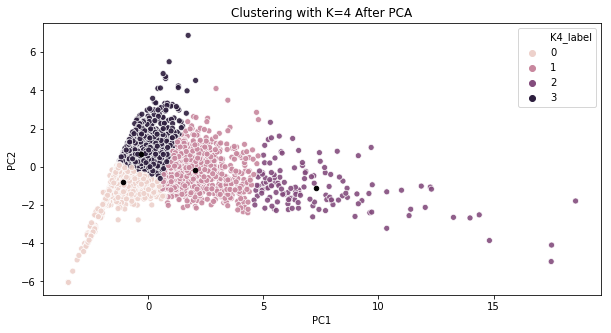

In [130]:
# plot the clusters components and centers

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(ax=ax, x='PC1', y='PC2', data=df_pca_two, hue='K4_label',alpha=0.9, legend='full')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20);
ax.set_title('Clustering with K=4 After PCA')

plt.show()

# Stretch Goal:

If you look at the original dataset you'll notice that I threw away some potentially useful columns. See if there are any that you could clean more effectively and turn into a numeric representation (probably some kind of one-hot-encoding of categorical variables) to assist your clustering. There's a lot more work here than the hours we have today however, so don't kill yourself trying to incorporate every single column from the original dataset, just take it one column at a time.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.